# Computer Vision 1: Assignment 1

Group Number 43

Marek Drwal

## setup

In [1]:
import imageio
import numpy as np
import skimage as ski

## task 1

### data

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009, https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_dir = "C:/Users/admin/Documents/cifar-10-python/cifar-10-batches-py"

In [4]:
label_names = unpickle(data_dir + '/batches.meta')

### batch 1

In [5]:
data_batch_1 = unpickle(data_dir + '/data_batch_1')
data_batch_1_labels = np.array(data_batch_1[b'labels'])

#### first 30 in classes

In [6]:
selected_classes = [1,4,8]

In [7]:
# extracted_top_30_list = np.empty(shape=(0,32,32), dtype=np.uint8)
extracted_top_30_list = []
extracted_top_30_labs = []

for class_lab in selected_classes:
    first30_img = data_batch_1[b'data'][data_batch_1_labels == class_lab][:30,]
    first30_lab = data_batch_1_labels[data_batch_1_labels == class_lab][:30,]
    # print(len(first30))
    # extracted_top_30_list = np.concatenate(extracted_top_30_list, first30_img)
    extracted_top_30_list.append(first30_img)
    extracted_top_30_labs.append(first30_lab)

extracted_top_30_list = np.array(extracted_top_30_list)
extracted_top_30_list = extracted_top_30_list.reshape((3*30, 3072))
extracted_top_30_labs = np.array(extracted_top_30_labs).ravel()
extracted_top_30_list

array([[170, 168, 177, ...,  82,  78,  80],
       [159, 150, 153, ...,  14,  17,  19],
       [ 50,  51,  42, ..., 166, 166, 162],
       ...,
       [ 58,  51,  50, ...,  70,  63,  57],
       [196, 203, 212, ...,  94, 100, 106],
       [ 61,  62,  62, ...,  92,  90,  91]], dtype=uint8)

#### histograms

In [8]:
bin_size = 5
no_bins = 51

In [9]:
hists_train = []

for img in extracted_top_30_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_train.append(hh)
    print(hh)

[ 5.  9.  6. 14.  9. 11. 11.  8.  8.  8.  6. 11. 13. 14. 17. 17. 22. 17.
 17. 16. 17. 14. 11. 15. 11.  9.  7.  9.  6.  4.  6.  4.  4.  6. 10.  8.
 13. 11. 12.  7.  4.  5.  5.  5.  4.  4.  4.  2.  2.  2.  1.  0.]
[ 0.  0.  3.  8.  5.  8. 13. 14. 16. 12. 18. 17. 16. 20. 24. 19. 22. 19.
 14. 14. 16. 16. 20. 20. 22. 16. 14. 25. 17. 12. 11. 16. 12. 11.  5.  8.
  3.  1.  2.  2.  1.  2.  0.  2.  0.  1.  0.  1.  2.  0.  0.  0.]
1.0
[12. 15. 14. 12. 13. 16. 16. 14. 14. 16. 19. 15. 16. 22. 18. 15. 20. 19.
 16. 15.  6. 13. 13. 14. 16.  9.  7. 14. 10.  5. 14. 15. 16. 16. 13. 17.
 10. 13.  6.  4.  6.  3.  3.  4.  4.  4.  3.  3.  2.  1.  2.  1.]
1.0
[ 0.  0.  2.  3.  5. 10. 13. 11. 14. 19. 16. 18. 25. 25. 20. 22. 19. 14.
 20. 14. 20. 26. 23. 18. 21. 12. 10. 17. 17. 17. 15.  9. 13. 12. 12.  7.
  8.  8.  9.  5. 10.  5.  5.  1.  2.  2.  2.  2.  1.  0.  2.  1.]
[ 5.  9.  7. 10. 13. 12.  9. 13. 15. 18. 19. 20. 17. 16. 16. 19. 21. 20.
 18. 18. 20. 16. 19. 18. 17. 14. 11. 15. 17. 14. 10.  9.  7.  9.  3.  6

[ 0.  0.  3.  6. 11.  7.  9.  7. 14. 20. 18. 19. 24. 19. 23. 21. 18. 25.
 25. 24. 28. 25. 25. 17. 14. 11. 11. 12.  8.  7. 10.  6.  6.  6.  6.  4.
  5.  5.  3.  2.  2.  3.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  2.  1.  3.  3.  2.  4.  5.  5.  5.  5.  4.  6.  8.  8.  7.  7.  7.
  7. 10. 10. 12. 15. 13. 12. 11. 11. 13. 17. 12. 14. 18. 20. 17. 16. 20.
 21. 19. 22. 18. 23. 20. 15.  8.  6.  4.  4.  0.  0.  1.  0.  0.]
[ 0.  0.  3.  8.  8.  5.  5. 11.  9. 12. 10. 13. 11. 10. 16. 20. 16. 18.
 13. 15. 13. 12. 13. 10. 13.  8.  8. 11. 10. 12. 13. 16. 12. 13. 13. 12.
  6.  3.  1.  3.  4.  5.  5.  7.  9. 10. 10.  9.  8.  0.  0.  0.]
32.0
[ 0.  1.  1.  5.  5.  5.  6.  7.  5.  3. 10.  6.  5. 10.  5.  6.  9.  7.
  9. 11.  8.  8. 11. 10. 10.  3.  7.  6. 10. 13. 11. 14. 17. 13. 12. 10.
 15.  9. 12.  9. 10.  9.  6.  8.  5.  7.  9.  5.  6.  7. 45. 32.]
[ 0. 10. 19. 24. 26. 22. 20. 22. 18. 20. 18. 18. 15. 19. 15. 16. 15. 15.
 16. 17. 11. 10. 10. 10.  6.  6.  5.  9.  7. 12. 10.  6.  9.  8.  6. 12.
 

### test batch

In [10]:
test_batch = unpickle(data_dir + '/test_batch')
test_batch_labels = np.array(test_batch[b'labels'])

#### first 10 in classes

In [11]:
extracted_top_10_list = []
extracted_top_10_labs = []

for class_lab in selected_classes:
    first10_img = test_batch[b'data'][test_batch_labels == class_lab][:10,]
    first10_lab = test_batch_labels[test_batch_labels == class_lab][:10,]
    extracted_top_10_list.append(first10_img)
    extracted_top_10_labs.append(first10_lab)

extracted_top_10_list = np.array(extracted_top_10_list)
extracted_top_10_list = extracted_top_10_list.reshape((3*10, 3072))
extracted_top_10_labs = np.array(extracted_top_10_labs).ravel()
extracted_top_10_list

array([[160, 185, 209, ...,  31,  34,  28],
       [217, 210, 205, ..., 204, 225, 223],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [215, 211, 207, ..., 132, 130, 129],
       [ 76,  76,  79, ...,  73,  73,  71],
       [255, 251, 251, ..., 250, 250, 251]], dtype=uint8)

#### histograms

In [12]:
hists_test = []

for img in extracted_top_10_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_test.append(hh)
    print(hh)

[ 4.  9. 16. 16. 15. 16. 17. 21. 23. 27. 27. 29. 27. 25. 22. 24. 14. 20.
 14. 11. 10. 12.  5.  9.  5.  7.  3.  3.  7.  5.  5.  6.  8.  7.  3.  4.
  4.  5.  4.  8.  6.  7.  6.  5.  4.  2.  5.  2.  0.  2.  1.  0.]
[ 0.  0.  0.  0.  0.  3.  9.  9.  9.  6.  8. 10. 12. 12. 11. 11. 16. 13.
 16. 16. 16. 18. 17. 16. 14.  3. 16. 11. 13. 14. 16. 16. 15. 21. 15. 15.
 17. 17. 14.  8. 20. 15. 14. 15. 12.  9. 13.  7.  7. 16.  8.  0.]
13.0
[ 0.  0.  1.  0.  3.  8.  7.  7.  5.  9.  9. 12.  9. 10.  9.  7.  8. 12.
  9. 10.  8.  8.  9. 10. 11.  9. 10.  9. 14. 15. 11. 13. 12. 14. 10. 11.
 16. 11. 12.  8.  7. 12. 11. 13. 14. 16. 15. 18. 16. 20. 27. 13.]
[ 1.  4.  5.  5.  7.  5.  7.  7.  8.  6.  6. 10. 11. 12. 10.  5.  8. 10.
 10.  9. 14. 15. 16. 13. 19. 17. 22. 24. 19. 18. 17. 16. 16. 11. 19. 12.
 10. 11. 10. 10.  5.  2.  2.  2.  2.  2.  1.  1.  0.  0.  0.  0.]
[ 8. 17. 10. 15. 17. 16. 15. 17. 16. 13.  9. 13. 13. 15. 14. 13. 11.  8.
  8.  7.  3.  6.  6.  7.  3.  2.  4.  3.  6.  3.  4.  2.  4.  5.  2.  3.
 

### classification

In [13]:
def L2_norm(h1, h2):
    return np.sqrt(np.sum(np.square(h1-h2)))

In [14]:
preds = np.zeros(len(hists_test))
preds = []
print('test id, tr id, lab 30, lab 10')
for test_id, test_h in enumerate(hists_test):
    dists = []
    for train_h in hists_train:
        dist = L2_norm(test_h, train_h)
        dists.append(dist)
    pred_id = np.argmin(dists)
    print(test_id, pred_id, extracted_top_30_labs[pred_id], extracted_top_10_labs[test_id])
    preds.append(extracted_top_30_labs[pred_id])

accuracy = np.sum(np.equal(preds, extracted_top_10_labs))
accuracy /= len(test_h)
accuracy

test id, tr id, lab 30, lab 10
0 25 1 1
1 9 1 1
2 18 1 1
3 33 4 1
4 46 4 1
5 26 1 1
6 71 8 1
7 16 1 1
8 39 4 1
9 3 1 1
10 30 4 4
11 52 4 4
12 43 4 4
13 26 1 4
14 67 8 4
15 7 1 4
16 30 4 4
17 34 4 4
18 40 4 4
19 52 4 4
20 72 8 8
21 67 8 8
22 9 1 8
23 76 8 8
24 36 4 8
25 77 8 8
26 65 8 8
27 22 1 8
28 10 1 8
29 24 1 8


np.float64(0.34615384615384615)

#### img peek

test set

np.int64(1)

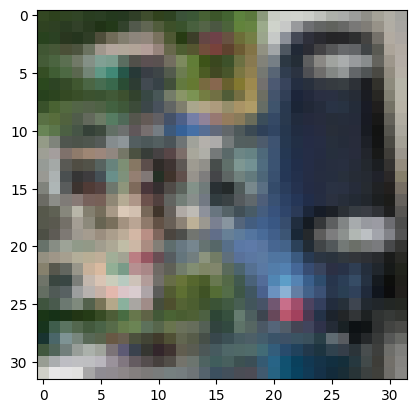

In [15]:
import matplotlib.pyplot as plt
xx = 9
plt.imshow(extracted_top_10_list[xx].reshape(3,32,32).T)
extracted_top_10_labs[xx]

training set

np.int64(1)

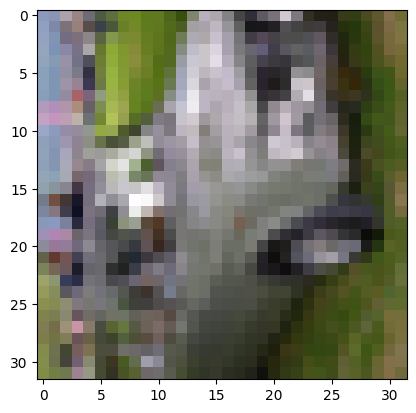

In [16]:
yy = 3
plt.imshow(extracted_top_30_list[yy].reshape(3,32,32).T)
extracted_top_30_labs[yy]

## wwe

## task 1 small bins

In [17]:
bin_size = 3
no_bins = 85

### batch 1

#### first 30 in classes

In [18]:
selected_classes = [1,4,8]

In [19]:
# extracted_top_30_list = np.empty(shape=(0,32,32), dtype=np.uint8)
extracted_top_30_list = []
extracted_top_30_labs = []

for class_lab in selected_classes:
    first30_img = data_batch_1[b'data'][data_batch_1_labels == class_lab][:30,]
    first30_lab = data_batch_1_labels[data_batch_1_labels == class_lab][:30,]
    # print(len(first30))
    # extracted_top_30_list = np.concatenate(extracted_top_30_list, first30_img)
    extracted_top_30_list.append(first30_img)
    extracted_top_30_labs.append(first30_lab)

extracted_top_30_list = np.array(extracted_top_30_list)
extracted_top_30_list = extracted_top_30_list.reshape((3*30, 3072))
extracted_top_30_labs = np.array(extracted_top_30_labs).ravel()
extracted_top_30_list

array([[170, 168, 177, ...,  82,  78,  80],
       [159, 150, 153, ...,  14,  17,  19],
       [ 50,  51,  42, ..., 166, 166, 162],
       ...,
       [ 58,  51,  50, ...,  70,  63,  57],
       [196, 203, 212, ...,  94, 100, 106],
       [ 61,  62,  62, ...,  92,  90,  91]], dtype=uint8)

#### histograms

In [20]:
hists_train = []

for img in extracted_top_30_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_train.append(hh)
    print(hh)

[ 3.  6.  8.  5.  4. 12.  6.  6.  9.  5.  6.  7.  6.  8.  4.  5.  6.  4.
  7.  9.  8. 10.  9. 13. 17. 15. 15. 16. 18. 16. 13. 13. 11. 15. 12. 11.
 12.  5. 12.  6.  8.  4.  8.  6.  7.  6.  5.  4.  2.  5.  3.  3.  3.  1.
  3.  5.  5.  8.  4.  8. 11.  9.  8.  9.  7.  6.  4.  2.  2.  3.  4.  4.
  2.  2.  3.  3.  3.  2.  2.  2.  1.  2.  1.  0.  1.  0.]
[ 0.  0.  0.  1.  3.  6.  4.  4.  7.  6. 10.  8. 11. 12. 11. 11.  9. 14.
 12. 13.  9. 14. 19. 20. 17. 14. 18. 17. 14. 14. 10. 14. 11. 11. 13. 13.
 11. 12. 11. 16. 15. 20. 13.  7. 20. 17. 11. 11.  9.  7.  8. 10. 11.  7.
  5.  9.  5.  3.  6.  2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  2.  0.  0.
  2.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]
1.0
[ 8. 13.  7. 13. 11. 10.  9.  9. 13. 12. 15.  9. 13.  5. 13. 10. 12. 11.
 12. 13. 12. 12. 13. 16. 11. 13. 14. 19. 14. 14. 14.  8. 10.  8.  5.  8.
  9.  8.  7. 13. 12. 13.  5.  6.  9. 10.  7.  6.  3.  7. 10. 10.  7. 10.
 12. 12. 10. 10. 14.  9.  8. 11.  2.  5.  1.  4.  5.  2.  0.  3.  2.  3.
  2.

### test batch

#### first 10 in classes

In [21]:
extracted_top_10_list = []
extracted_top_10_labs = []

for class_lab in selected_classes:
    first10_img = test_batch[b'data'][test_batch_labels == class_lab][:10,]
    first10_lab = test_batch_labels[test_batch_labels == class_lab][:10,]
    extracted_top_10_list.append(first10_img)
    extracted_top_10_labs.append(first10_lab)

extracted_top_10_list = np.array(extracted_top_10_list)
extracted_top_10_list = extracted_top_10_list.reshape((3*10, 3072))
extracted_top_10_labs = np.array(extracted_top_10_labs).ravel()
extracted_top_10_list

array([[160, 185, 209, ...,  31,  34,  28],
       [217, 210, 205, ..., 204, 225, 223],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [215, 211, 207, ..., 132, 130, 129],
       [ 76,  76,  79, ...,  73,  73,  71],
       [255, 251, 251, ..., 250, 250, 251]], dtype=uint8)

#### histograms

In [22]:
hists_test = []

for img in extracted_top_10_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_test.append(hh)
    print(hh)

[ 1.  5.  7.  8. 12. 14. 11. 11. 11. 14. 14. 11. 17. 13. 19. 23. 19. 15.
 24. 27. 22. 25. 18. 22. 13. 15. 16. 10. 13. 13.  8.  9.  9.  9.  5.  8.
  8.  3.  3.  7.  2.  5.  4.  3.  2.  1.  6.  3.  3.  5.  2.  6.  3.  4.
  5.  4.  2.  3.  2.  1.  3.  3.  5.  2.  5.  4.  5.  1.  5.  4.  4.  3.
  3.  2.  2.  1.  4.  4.  1.  0.  0.  1.  2.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  3.  8.  5.  6.  9.  4.  6.  3.  6.
  7.  8.  9. 11.  5. 11. 10.  9.  8. 14. 10.  8. 12.  8. 12.  8. 16. 12.
 14.  9. 18. 12. 10.  9.  3. 13.  7.  7. 10.  6.  8. 12. 10. 10. 14. 10.
 13. 16. 11. 12.  6. 13. 11. 15.  8. 12.  8.  6. 18. 11.  9. 10. 12. 11.
 10. 10.  7.  7. 11.  7.  5.  3.  6. 14. 16.  4.  0.  0.]
11.0
[ 0.  0.  0.  0.  1.  0.  1.  1.  4.  7.  2.  8.  5.  4.  4.  6.  5.  6.
  7. 11.  8.  5.  9.  8.  3.  6.  5.  6.  8.  9.  6.  8.  7.  5.  6.  6.
  5.  7.  8.  6.  8.  7.  8.  7.  8.  6. 11.  8. 13.  9.  7. 12. 11.  7.
  8.  7.  7.  8.  7. 11.  9.  7.  6. 11.  6.  6.  7.  5.  9.  9. 10. 10.
 13

### classification

In [23]:
def L2_norm(h1, h2):
    return np.sqrt(np.sum(np.square(h1-h2)))

In [24]:
preds = np.zeros(len(hists_test))
preds = []
print('test id, tr id, lab 30, lab 10')
for test_id, test_h in enumerate(hists_test):
    dists = []
    for train_h in hists_train:
        dist = L2_norm(test_h, train_h)
        dists.append(dist)
    pred_id = np.argmin(dists)
    print(test_id, pred_id, extracted_top_30_labs[pred_id], extracted_top_10_labs[test_id])
    preds.append(extracted_top_30_labs[pred_id])

accuracy = np.sum(np.equal(preds, extracted_top_10_labs))
accuracy /= len(test_h)
accuracy

test id, tr id, lab 30, lab 10
0 15 1 1
1 9 1 1
2 18 1 1
3 33 4 1
4 46 4 1
5 26 1 1
6 47 4 1
7 16 1 1
8 39 4 1
9 1 1 1
10 30 4 4
11 52 4 4
12 43 4 4
13 55 4 4
14 67 8 4
15 7 1 4
16 30 4 4
17 33 4 4
18 37 4 4
19 52 4 4
20 72 8 8
21 23 1 8
22 9 1 8
23 76 8 8
24 36 4 8
25 72 8 8
26 62 8 8
27 22 1 8
28 10 1 8
29 24 1 8


np.float64(0.20930232558139536)

#### img peek

test set

np.int64(8)

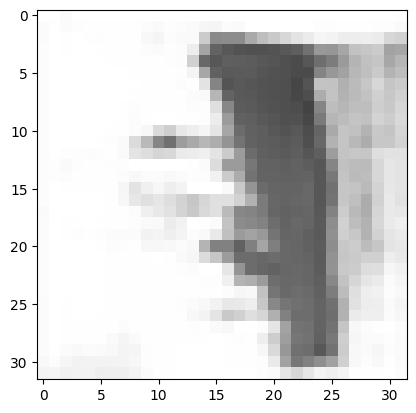

In [39]:
import matplotlib.pyplot as plt
xx = 29
plt.imshow(extracted_top_10_list[xx].reshape(3,32,32).T)
extracted_top_10_labs[xx]

training set

np.int64(1)

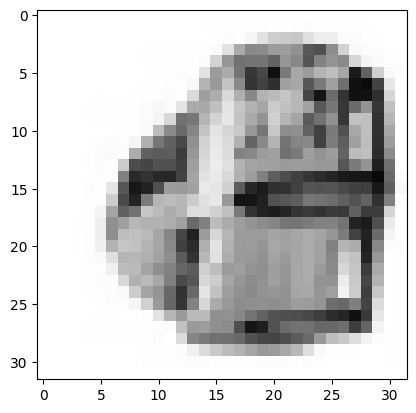

In [40]:
yy = 24
plt.imshow(extracted_top_30_list[yy].reshape(3,32,32).T)
extracted_top_30_labs[yy]

## task 1 wide bins

In [27]:
bin_size = 15
no_bins = 17

### batch 1

#### first 30 in classes

In [28]:
selected_classes = [1,4,8]

In [29]:
# extracted_top_30_list = np.empty(shape=(0,32,32), dtype=np.uint8)
extracted_top_30_list = []
extracted_top_30_labs = []

for class_lab in selected_classes:
    first30_img = data_batch_1[b'data'][data_batch_1_labels == class_lab][:30,]
    first30_lab = data_batch_1_labels[data_batch_1_labels == class_lab][:30,]
    # print(len(first30))
    # extracted_top_30_list = np.concatenate(extracted_top_30_list, first30_img)
    extracted_top_30_list.append(first30_img)
    extracted_top_30_labs.append(first30_lab)

extracted_top_30_list = np.array(extracted_top_30_list)
extracted_top_30_list = extracted_top_30_list.reshape((3*30, 3072))
extracted_top_30_labs = np.array(extracted_top_30_labs).ravel()
extracted_top_30_list

array([[170, 168, 177, ...,  82,  78,  80],
       [159, 150, 153, ...,  14,  17,  19],
       [ 50,  51,  42, ..., 166, 166, 162],
       ...,
       [ 58,  51,  50, ...,  70,  63,  57],
       [196, 203, 212, ...,  94, 100, 106],
       [ 61,  62,  62, ...,  92,  90,  91]], dtype=uint8)

#### histograms

In [30]:
hists_train = []

for img in extracted_top_30_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_train.append(hh)
    print(hh)

2.0
[11. 15. 14. 16. 20. 25. 24. 21. 14. 12. 11. 11. 18. 15.  8.  8.  6.  2.]
[ 3. 11. 22. 23. 28. 31. 26. 27. 27. 26. 22. 22. 10.  5.  3.  3.  3.  0.]
2.0
[21. 22. 24. 26. 29. 26. 26. 21. 20. 18. 19. 24. 22. 17.  9.  6.  8.  2.]
2.0
[ 2. 12. 18. 26. 31. 28. 27. 30. 24. 23. 23. 20. 17. 14. 14.  5.  6.  2.]
[15. 17. 20. 26. 21. 29. 28. 27. 21. 19. 22. 12.  8.  7.  5.  4.  0.  0.]
11.0
[ 2. 10. 18. 26. 29. 27. 23. 24. 21. 15. 16. 16.  7. 14. 13.  8. 21. 11.]
6.0
[ 3. 21. 26. 30. 31. 29. 25. 23. 16. 12. 19. 18. 22. 21. 17. 18. 16.  6.]
2.0
[ 3. 10. 13. 15. 20. 20. 22. 31. 28. 23. 31. 31. 31. 24. 17. 11.  8.  2.]
[ 0. 10. 27. 23. 27. 26. 26. 26. 22. 18. 24. 19. 17. 13. 12.  8.  5.  0.]
8.0
[ 0.  3. 15. 21. 23. 23. 25. 27. 23. 27. 27. 30. 29. 28. 25. 14. 22.  8.]
[ 0.  1.  5. 12. 12. 14. 19. 29. 28. 23. 23. 23. 17. 10.  3.  2.  0.  0.]
25.0
[ 6. 11. 14.  9. 16. 15. 29. 15. 10. 15. 18. 23. 24. 19. 24. 23. 44. 25.]
7.0
[ 0.  0.  6. 20. 28. 28. 30. 26. 19. 17. 20. 19. 24. 21. 19. 13. 18.  7.]


### test batch

#### first 10 in classes

In [31]:
extracted_top_10_list = []
extracted_top_10_labs = []

for class_lab in selected_classes:
    first10_img = test_batch[b'data'][test_batch_labels == class_lab][:10,]
    first10_lab = test_batch_labels[test_batch_labels == class_lab][:10,]
    extracted_top_10_list.append(first10_img)
    extracted_top_10_labs.append(first10_lab)

extracted_top_10_list = np.array(extracted_top_10_list)
extracted_top_10_list = extracted_top_10_list.reshape((3*10, 3072))
extracted_top_10_labs = np.array(extracted_top_10_labs).ravel()
extracted_top_10_list

array([[160, 185, 209, ...,  31,  34,  28],
       [217, 210, 205, ..., 204, 225, 223],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [215, 211, 207, ..., 132, 130, 129],
       [ 76,  76,  79, ...,  73,  73,  71],
       [255, 251, 251, ..., 250, 250, 251]], dtype=uint8)

#### histograms

In [32]:
hists_test = []

for img in extracted_top_10_list:
    red = img[:1024].reshape((32, 32)).astype(np.float64)
    green = img[1024:2048].reshape((32, 32)).astype(np.float64)
    blue = img[2048:].reshape((32, 32)).astype(np.float64)
    gray = red + green + blue
    gray /= 3
    hh = np.zeros((no_bins+1)) # extra one for 255
    for px in gray:
        hh[px.astype(np.int8)//bin_size] += 1
    hh[no_bins-1] += hh[-1] # adjust the end
    if (hh[-1] > 0):
        print(hh[-1])
    hists_test.append(hh)
    print(hh)

2.0
[17. 24. 29. 32. 32. 30. 23. 18. 10.  5. 11. 13.  7. 12. 11.  7.  8.  2.]
21.0
[ 0.  3. 12. 13. 17. 19. 24. 24. 14. 21. 25. 25. 25. 25. 28. 21. 37. 21.]
21.0
[ 1.  8. 10. 16. 14. 17. 19. 20. 14. 14. 22. 22. 24. 20. 20. 21. 44. 21.]
[ 5.  8. 11. 11. 23. 16. 22. 25. 25. 27. 27. 25. 23. 15.  5.  3.  1.  0.]
2.0
[22. 20. 25. 16. 16. 15. 12. 11.  4.  6. 10.  8.  6.  6.  5.  4.  5.  2.]
1.0
[ 0.  3.  9. 17. 26. 26. 28. 30. 28. 26. 32. 15.  8.  6.  3.  2.  3.  1.]
3.0
[ 1. 15. 19. 23. 22. 25. 20. 20. 21. 18. 24. 22. 14. 15. 12.  5.  7.  3.]
26.0
[ 3.  9. 10. 13. 13. 18. 17. 16.  9.  9. 10.  7.  8.  6.  6. 12. 37. 26.]
[ 1.  2. 10. 15. 23. 22. 23. 25. 23. 19. 24. 17. 16. 17. 11.  5.  1.  0.]
[ 1.  7. 21. 25. 32. 31. 31. 31. 26. 21. 23. 22. 18. 10.  9.  1.  2.  0.]
[ 0.  1.  9. 18. 32. 32. 27. 18.  6.  1.  5.  1.  0.  0.  0.  0.  0.  0.]
7.0
[ 2. 11. 17. 28. 28. 32. 30. 23. 11. 13. 16.  6.  8.  4.  8.  7. 16.  7.]
[ 0.  0.  0.  0.  2. 18. 25. 28. 25. 25. 24. 19. 14.  9.  6.  3.  0.  0.]
[ 0

### classification

In [33]:
def L2_norm(h1, h2):
    return np.sqrt(np.sum(np.square(h1-h2)))

In [34]:
preds = np.zeros(len(hists_test))
preds = []
print('test id, tr id, lab 30, lab 10')
for test_id, test_h in enumerate(hists_test):
    dists = []
    for train_h in hists_train:
        dist = L2_norm(test_h, train_h)
        dists.append(dist)
    pred_id = np.argmin(dists)
    print(test_id, pred_id, extracted_top_30_labs[pred_id], extracted_top_10_labs[test_id])
    preds.append(extracted_top_30_labs[pred_id])

accuracy = np.sum(np.equal(preds, extracted_top_10_labs))
accuracy /= len(test_h)
accuracy

test id, tr id, lab 30, lab 10
0 25 1 1
1 18 1 1
2 18 1 1
3 26 1 1
4 46 4 1
5 40 4 1
6 8 1 1
7 56 4 1
8 42 4 1
9 3 1 1
10 48 4 4
11 5 1 4
12 43 4 4
13 55 4 4
14 8 1 4
15 53 4 4
16 48 4 4
17 10 1 4
18 55 4 4
19 5 1 4
20 72 8 8
21 67 8 8
22 9 1 8
23 76 8 8
24 39 4 8
25 72 8 8
26 62 8 8
27 32 4 8
28 10 1 8
29 56 4 8


np.float64(0.9444444444444444)

#### img peek

test set

np.int64(8)

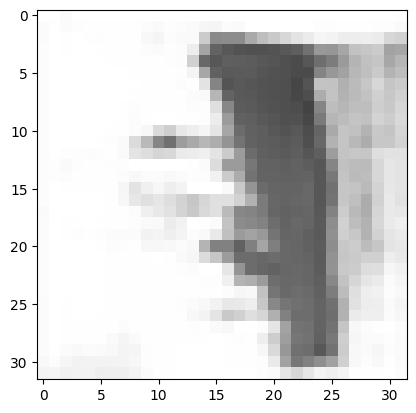

In [37]:
import matplotlib.pyplot as plt
xx = 29
plt.imshow(extracted_top_10_list[xx].reshape(3,32,32).T)
extracted_top_10_labs[xx]

training set

np.int64(4)

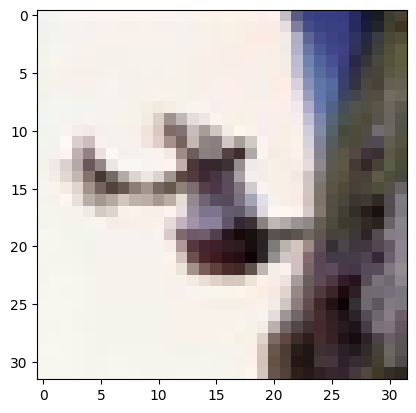

In [38]:
yy = 56
plt.imshow(extracted_top_30_list[yy].reshape(3,32,32).T)
extracted_top_30_labs[yy]